In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


В следующих двух ячейках я построил интерполяционную кривую, используя средства numpy.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

h = 1
x_vals = np.arange(0, 15, h)
y_vals = np.array([1, 1.5, 1.7, 2, 2.1, 2.2, 7, 7.1, 3.2, 2, 2, 2, 7, 2, 2])

# Коэффициенты 
calc_m_0 = 1/6./h*(-11 * y_vals[0] + 18 * y_vals[1] - 9 * y_vals[2] + 2 * y_vals[3]) 
calc_m_n = 1/6./h*(11 * y_vals[-1] - 18 * y_vals[-2] + 9 * y_vals[-3] - 2 * y_vals[-4]) 
m_values = [(y_vals[i]+y_vals[i+1])/2.*h for i in range(0, len(y_vals)-1)]
m_values.insert(0, calc_m_0)
m_values.append(calc_m_n)

#print(x_vals)
#print(y_vals)
#print(m_values)

tck = interpolate.splrep(x_vals, y_vals, s=0)
xnew = x_vals
ynew = interpolate.splev(xnew, tck, der=0)

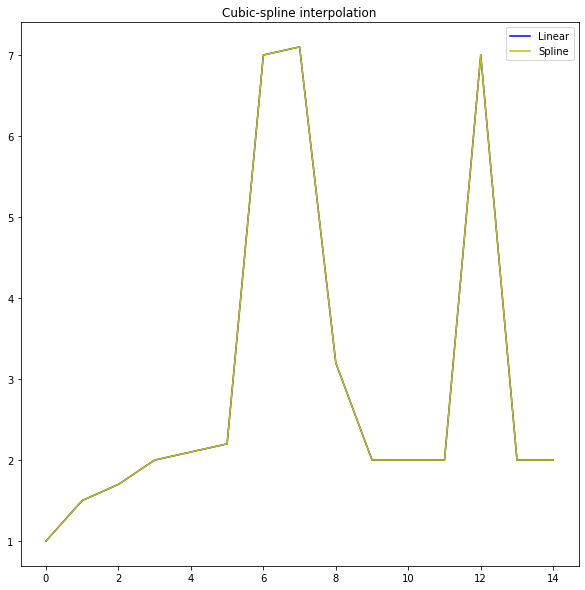

In [38]:
plt.figure(figsize=(10,10))
plt.plot(x_vals, y_vals, 'b')
plt.plot(xnew, ynew, 'y')
plt.legend(['Linear', 'Spline'])
#plt.axis([-10.05, 10.05, -10.05, 10.05])
plt.title('Интерполяция кубическими сплайнами с использованием библиотеки ')
plt.show()

В следующей ячейке я получил разделил отрезок $[0, 14]$ на 14 участков, получил сплайны на каждом участке для интерполяции, следуя алгоритму, описанному ниже, построил график полученных сплайнов вместе с исходным графиком
- найти примерное значение первых производных в точках $x_0$ и $x_n$ по формулам $m_0 = \frac1{6h}*(-11f(x_0)+18f(x_1)-9f(x_2)+2f(x_3))$ и $m_1 = \frac1{6h}*(-11f(x_n)+18f(x_{n-1})-9f(x_{n-2})+2f(x_{n-3}))$
- найти примерные значения для первых производных в других точках по формулым $m_i = \frac{f_i-f_{i-1}}2 , i=1..n-1$
- подставить полученные значения в формулу для получения сплайна 3ей степени, описывающее интерполированное поведение кривой на участке $[a_i,a_{i+1}]$ $S_i(x) = \frac{(x_{i+1}-x)^2)(2(x-x_i)+h)}{h^3}*f_i + \frac{(x-x_{i})^2)(2(x_{i+1}-x)+h)}{h^3}*f_{i+1} + \frac{(x_{i+1}-x)^2(x-x_i)}{h^2}*m_i \frac{(x-x_{i})^2(x-x_{i+1})}{h^2}*m_{i+1} $

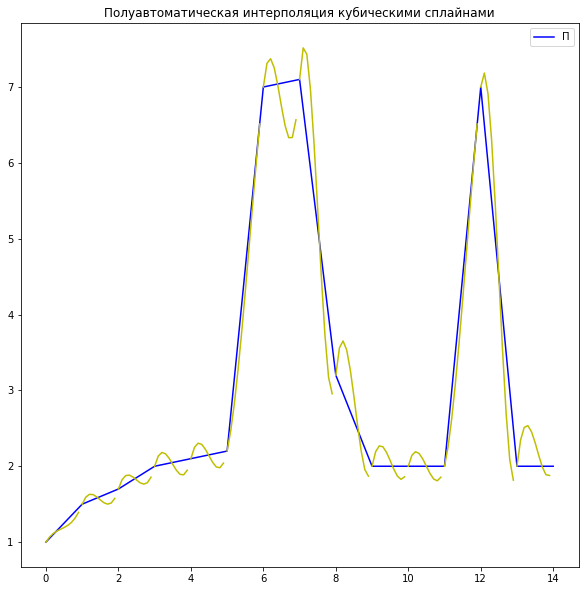

In [54]:
import sympy as sp
x = sp.symbols('x')

def expand_polynom(x_i, x_next, y_i, y_next, m_i, m_next):
    return sp.expand( (x_next-x)**2*(2*(x-x_i)+1)*y_i + (x-x_i)**2*(2*(x_next-x)+1)*y_next + (x_next-x)**2*(x-x_i)*m_i + (x-x_i)**2*(x-x_next)*m_next)

splines = []
x_spline_vals = []
y_spline_vals = []
range_spline_points = 10

plt.figure(figsize=(10,10))
plt.plot(x_vals, y_vals, 'b')
plt.legend('По точкам')
plt.title('Полуавтоматическая интерполяция кубическими сплайнами')


for i in range(0, len(x_vals)-1):
    spline = expand_polynom(x_vals[i], x_vals[i+1], y_vals[i], y_vals[i+1], m_values[i], m_values[i+1])
    temp_x_vals = np.arange(i, i+1, (i+1-i)/range_spline_points)
    temp_y_vals = [spline.subs(x, val) for val in temp_x_vals]
    #print(temp_x_vals)
    #print(temp_y_vals)
    plt.plot(temp_x_vals, temp_y_vals, 'y')
    #print(f"{i} {spline}")
    splines.append(spline)

plt.show()